<a href="https://colab.research.google.com/github/Aniketh-GHub/Supervised-Learning-Projects/blob/main/German_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
#load dataset
data = pd.read_csv("/content/Top_12_German_Companies NEW.csv")

In [3]:
data.head()

,Company,Period,Revenue,Net Income,Liabilities,Assets,Equity,ROA (%),ROE (%),Debt to Equity,percentage Debt to Equity
0,Volkswagen AG,12/31/2017,9750496618,5.168898e+08,21354201295,54861302788,33507101493,942.175.618,1.542.627.668,637.303.746,"0,00%"
1,Siemens AG,12/31/2017,19716237464,1.276840e+09,45009303223,75268101508,30258798286,1.696.389.282,4.219.731.382,1.487.478.214,"283,68%"
2,Allianz SE,12/31/2017,19458831198,1.600107e+09,48538978480,69583711255,21044732775,2.299.542.624,7.603.361.452,2.306.466.848,"329,65%"
3,BMW AG,12/31/2017,18808147150,9.601843e+08,35382107627,67327482638,31945375011,142.614.028,3.005.706.927,1.107.581.539,"0,00%"
4,BASF SE,12/31/2017,16895580815,1.797082e+09,28309420014,68036567115,39727147101,2.641.347.127,4.523.561.449,71.259.635,"634,80%"


In [4]:
data.tail()

,Company,Period,Revenue,Net Income,Liabilities,Assets,Equity,ROA (%),ROE (%),Debt to Equity,percentage Debt to Equity
379,SAP SE,9/30/2024,10824151396,8.302800e+08,42369695133,72342104340,29972409208,114.771.336,2.770.147.673,1.413.623.271,"0,00%"
380,Bayer AG,9/30/2024,9332023907,7.466675e+08,23673143006,42677324477,19004181470,1.749.565.031,3.928.964.508,1.245.680.749,"0,00%"
381,Deutsche Bank AG,9/30/2024,18549946525,2.323022e+09,49199711543,64461554635,15261843092,3.603.732.773,1.522.111.161,3.223.707.074,"472,16%"
382,Porsche AG,9/30/2024,15911174550,1.241694e+09,36125130235,84583217359,48458087124,1.468.014.459,2.562.407.917,745.492.288,"343,72%"
383,Merck KGaA,9/30/2024,15036344926,1.704098e+09,30603212259,59444780752,28841568494,2.866.690.036,5.908.477.575,1.061.080.026,"556,84%"


In [5]:
data.isna().sum()

,0
Company,0
Period,0
Revenue,0
Net Income,0
Liabilities,0
Assets,0
Equity,0
ROA (%),0
ROE (%),0
Debt to Equity,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     384 non-null    object 
 1   Period                      384 non-null    object 
 2   Revenue                     384 non-null    int64  
 3   Net Income                  384 non-null    float64
 4   Liabilities                 384 non-null    int64  
 5   Assets                      384 non-null    int64  
 6   Equity                      384 non-null    int64  
 7   ROA (%)                     384 non-null    object 
 8   ROE (%)                     384 non-null    object 
 9   Debt to Equity              384 non-null    object 
 10  percentage  Debt to Equity  384 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 33.1+ KB


In [7]:
data.describe()

,Revenue,Net Income,Liabilities,Assets,Equity
count,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02
mean,1.270992e+10,1.249025e+09,3.115579e+10,6.141624e+10,3.026045e+10
std,4.095183e+09,5.445441e+08,1.139538e+10,1.698922e+10,1.172803e+10
min,5.149850e+09,2.980309e+08,1.004637e+10,2.177324e+10,1.001762e+10
25%,9.315161e+09,8.643813e+08,2.085174e+10,5.074013e+10,1.966813e+10
50%,1.266963e+10,1.145476e+09,3.230659e+10,6.020715e+10,2.999063e+10
75%,1.621724e+10,1.560234e+09,4.088942e+10,7.369075e+10,3.984646e+10
max,1.990964e+10,2.884007e+09,4.976940e+10,9.657402e+10,4.991812e+10


In [8]:
pre_value = data['Equity'].value_counts()
print(pre_value)



Equity
33507101493    1
30258798286    1
44722189642    1
29262180763    1
48315458259    1
              ..
48682247520    1
36122528684    1
48801871894    1
29346615849    1
28841568494    1
Name: count, Length: 384, dtype: int64


In [9]:
X = data.drop(columns=['Company', 'Period'])  # Drop 'Company' and 'Period', assuming they are identifiers
y = data['Equity']  # Target variable



In [10]:
X.head()

,Revenue,Net Income,Liabilities,Assets,Equity,ROA (%),ROE (%),Debt to Equity,percentage Debt to Equity
0,9750496618,5.168898e+08,21354201295,54861302788,33507101493,942.175.618,1.542.627.668,637.303.746,"0,00%"
1,19716237464,1.276840e+09,45009303223,75268101508,30258798286,1.696.389.282,4.219.731.382,1.487.478.214,"283,68%"
2,19458831198,1.600107e+09,48538978480,69583711255,21044732775,2.299.542.624,7.603.361.452,2.306.466.848,"329,65%"
3,18808147150,9.601843e+08,35382107627,67327482638,31945375011,142.614.028,3.005.706.927,1.107.581.539,"0,00%"
4,16895580815,1.797082e+09,28309420014,68036567115,39727147101,2.641.347.127,4.523.561.449,71.259.635,"634,80%"


In [11]:
y.head()

,Equity
0,33507101493
1,30258798286
2,21044732775
3,31945375011
4,39727147101


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
X_train.shape, X_test.shape

((257, 9), (127, 9))

In [16]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

numeric_columns = ['Revenue', 'Net Income', 'Liabilities', 'Assets', 'Equity']
for col in numeric_columns:
    data[col] = data[col].replace({',': '', '.': ''}, regex=True)
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.fillna(data.mean())

X = data.drop(columns=['Company', 'Period'])
y = data['Equity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DTree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
DTree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [17]:
y_pred = DTree.predict(X_test)
y_pred

array([10018751320, 10018751320, 10018751320, 10018751320, 10018751320,
       10018751320, 10018751320, 10018751320, 10018751320, 10018751320,
       10018751320, 10018751320, 10018751320, 10018751320, 10018751320,
       10018751320, 10018751320, 10018751320, 10018751320, 10018751320,
       10018751320, 10018751320, 10018751320, 10018751320, 10018751320,
       10018751320, 10018751320, 10018751320, 10018751320, 10018751320,
       10018751320, 10018751320, 10018751320, 10018751320, 10018751320,
       10018751320, 10018751320, 10018751320, 10018751320, 10018751320,
       10018751320, 10018751320, 10018751320, 10018751320, 10018751320,
       10018751320, 10018751320, 10018751320, 10018751320, 10018751320,
       10018751320, 10018751320, 10018751320, 10018751320, 10018751320,
       10018751320, 10018751320, 10018751320, 10018751320, 10018751320,
       10018751320, 10018751320, 10018751320, 10018751320, 10018751320,
       10018751320, 10018751320, 10018751320, 10018751320, 10018

In [18]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.0000


In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

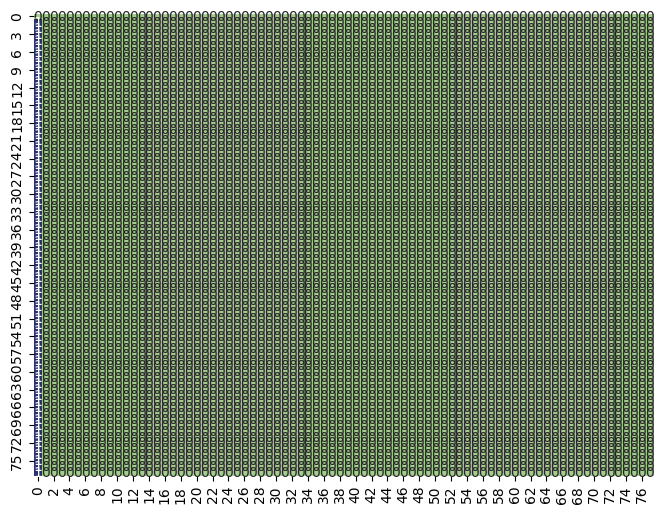

In [20]:
# Display the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False)
plt.show()

In [21]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

 10018751320       0.00      0.00      0.00       0.0
 10560668658       0.00      0.00      0.00       1.0
 10659050238       0.00      0.00      0.00       1.0
 10722538138       0.00      0.00      0.00       1.0
 11204836955       0.00      0.00      0.00       1.0
 11599775933       0.00      0.00      0.00       1.0
 12180852427       0.00      0.00      0.00       1.0
 13157833026       0.00      0.00      0.00       1.0
 13805394830       0.00      0.00      0.00       1.0
 15807079033       0.00      0.00      0.00       1.0
 16226483469       0.00      0.00      0.00       1.0
 16618100141       0.00      0.00      0.00       1.0
 17310486949       0.00      0.00      0.00       1.0
 17374218871       0.00      0.00      0.00       1.0
 17811720171       0.00      0.00      0.00       1.0
 18010539913       0.00      0.00      0.00       1.0
 18432801897       0.00      0.00      0.00       1.0
 18768088693       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

[Text(0.3333333333333333, 0.875, 'Equity <= 10018185216.0\ngini = 0.997\nsamples = 307\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 

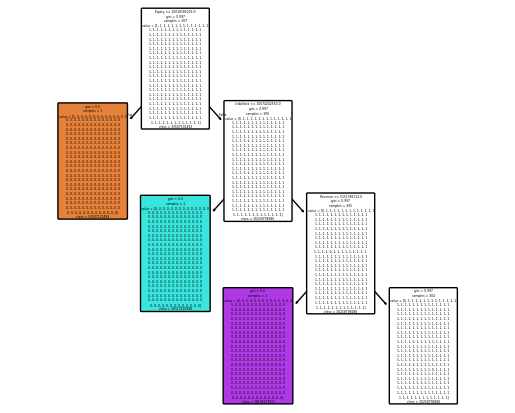

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Fit the decision tree model
DTree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
DTree.fit(X_train, y_train)

# Plot the decision tree
plot_tree(DTree, filled=True, feature_names=X.columns, class_names=[str(i) for i in y.unique()], rounded=True)



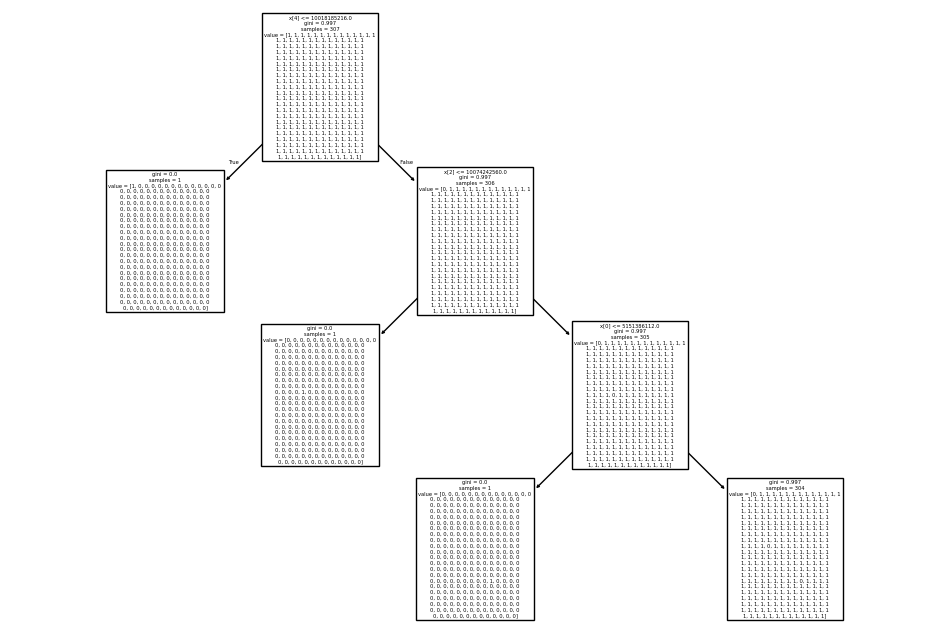

In [26]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(DTree.fit(X_train, y_train))
plt.show()